<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/Adidas_Sports_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

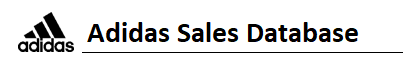

# **IMPORTING THE REQUIRED PYTHON LIBRARIES**

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

# **READING THE DATASET USING PANDAS LIBRARY**

In [ ]:
#Reading the dataset
adidas = pd.read_csv ('/content/Adidas US Sales Datasets.csv')
adidas

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet


# **SHAPE OF THE DATAFRAME**

In [ ]:
#Checking for the shape of the dataframe
adidas.shape

(9648, 13)

#**CHECKING FOR DUPLICATE VALUE**

In [ ]:
# check for duplicate values and remove them
adidas.duplicated().sum()

0

# **GETTING THE DATA INFORMATION**

In [ ]:
#Getting data information
adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [ ]:
#Checking top rows and columns
adidas.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store


In [ ]:
#Checking bottom rows and columns
adidas.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,$50.00,64,"$3,200",$896,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,$41.00,105,"$4,305","$1,378",32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,$41.00,184,"$7,544","$2,791",37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,$42.00,70,"$2,940","$1,235",42%,Outlet
9647,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Women's Street Footwear,$29.00,83,"$2,407",$650,27%,Outlet


# **DATA ANALYSIS**


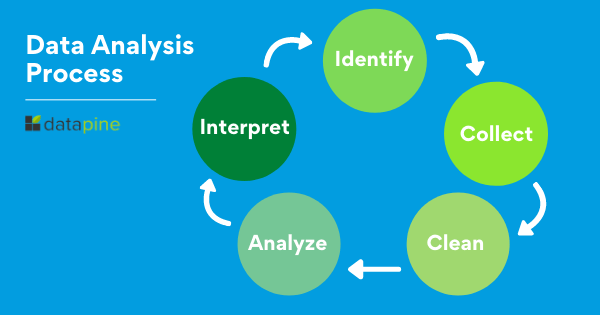

***DATA CLEANING AND PRE-PROCESSING***

In [ ]:
#Checking for null values
adidas.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

***REMOVING NON-NUMERIC CHARACTERS FROM COLUMNS***

In [ ]:
# Remove non-numeric characters from 'Total Sales' column
adidas['Total Sales'] = adidas['Total Sales'].str.replace(r'[$, ]', '', regex=True).astype(float)

In [ ]:
# Remove non-numeric characters from 'Units Sold' column
adidas['Units Sold'] = adidas['Units Sold'].str.replace(r'[$, ]', '', regex=True).astype(float)

In [ ]:
# Remove non-numeric characters from 'Operating Profit' column
adidas['Operating Profit'] = adidas['Operating Profit'].str.replace(r'[$, ]', '', regex=True).astype(float)

In [ ]:
# Remove non-numeric characters from 'Operating Margin' column
adidas['Operating Margin'] = adidas['Operating Margin'].str.rstrip('%').astype(float)/100

***CONVERTING INVOICE DATE TO DATE TIME OBJECT***

In [ ]:
# Convert 'Invoice Date' back to DateTime objects
adidas['Invoice Date'] = pd.to_datetime(adidas['Invoice Date'])

***EXTRACTING YEAR AND MONTH FROM INVOICE DATE***

In [ ]:
# Extract year and month from 'Invoice Date'
adidas['Year'] = adidas['Invoice Date'].dt.year
adidas['Month'] = adidas['Invoice Date'].dt.month

#**EXPLORATORY DATA ANALYSIS**

# **AVERAGE OPERATING MARGIN**

In [ ]:
# Calculate average operating margin
average_operating_margin = adidas['Operating Margin'].mean()
print(f"Average Operating Margin: {average_operating_margin}")

Average Operating Margin: 0.42299129353233833


#**YEAR-OVER-YEAR PROFIT (YOY)**

In [ ]:
# Calculate YOY profit
adidas['YOY Profit'] = adidas['Operating Profit'].pct_change(periods=1) * 100
print(adidas)

         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product Price per Unit  Units Sold  \
0       New York      Men's Street Footwear      

#**REMOVE ROWS WITH NAN VALUES FROM YOY PROFIT COLUMN**

In [ ]:
# Remove rows with NaN values in 'YOY Profit' column
yoy_cleaned = adidas.dropna(subset=['YOY Profit'])

print(yoy_cleaned)

         Retailer  Retailer ID Invoice Date     Region          State  \
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
5     Foot Locker      1185732   2020-01-06  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product Price per Unit  Units Sold  \
1       New York    Men's Athletic Footwear      

#**AVERAGE REVENUE**

In [ ]:
# Calculate average revenue
total_revenue = adidas['Total Sales'].sum()
number_of_periods = adidas.shape[0]
average_revenue = total_revenue / number_of_periods

print(f"Average Revenue: {average_revenue}")

Average Revenue: 93273.4375


#**REVENUE FOR EACH YEAR**

In [ ]:
# Calculate revenue for each year
revenue_per_year = adidas.groupby('Year')['Total Sales'].sum()

print(f"Revenue For Each Year: \n{revenue_per_year }")

Revenue For Each Year: 
Year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


#**REVENUE SAME PERIOD LAST YEAR**

In [ ]:
# Calculate revenue for the same period last year
revenue_SPLY = []
for index, row in adidas.iterrows():
    same_period_last_year = adidas[(adidas['Year'] == row['Year'] - 1) & (adidas['Month'] == row['Month'])]
    revenue_SPLY.append(same_period_last_year['Total Sales'].sum())

adidas['Revenue SPLY'] = revenue_SPLY

print(adidas)

         Retailer  Retailer ID Invoice Date     Region          State  \
0     Foot Locker      1185732   2020-01-01  Northeast       New York   
1     Foot Locker      1185732   2020-01-02  Northeast       New York   
2     Foot Locker      1185732   2020-01-03  Northeast       New York   
3     Foot Locker      1185732   2020-01-04  Northeast       New York   
4     Foot Locker      1185732   2020-01-05  Northeast       New York   
...           ...          ...          ...        ...            ...   
9643  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9644  Foot Locker      1185732   2021-01-24  Northeast  New Hampshire   
9645  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9646  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   
9647  Foot Locker      1185732   2021-02-22  Northeast  New Hampshire   

            City                    Product Price per Unit  Units Sold  \
0       New York      Men's Street Footwear      

#**TOTAL REVENUE**

In [ ]:
# Calculate total revenue
total_revenue = adidas['Total Sales'].sum()

print(f"Total Revenue: {total_revenue}")

Total Revenue: 899902125.0


# **TOTAL SALES BY MONTH AND YEAR**

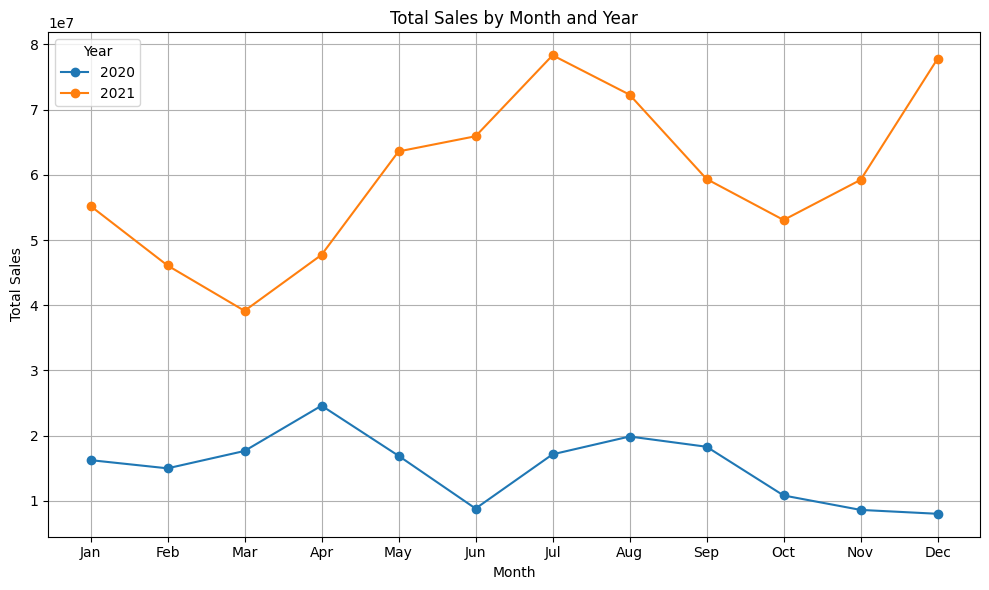

Year and Month with the Highest Sales:
Year: 2021, Month: July, Sales: 78334681.0

Year and Month with the Lowest Sales:
Year: 2020, Month: December, Sales: 8026527.0


In [ ]:
# Calculate total sales by month and year
total_sales_by_month_year = adidas.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Create a line chart for total sales by month and year
plt.figure(figsize=(10, 6))
for year in total_sales_by_month_year['Year'].unique():
   year_data = total_sales_by_month_year[total_sales_by_month_year['Year'] == year]
   plt.plot(year_data['Month'], year_data['Total Sales'], label=str(year), marker='o')

plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month and Year')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the month with the highest and lowest sales across both years
highest_sales_month = total_sales_by_month_year.loc[total_sales_by_month_year['Total Sales'].idxmax()]
lowest_sales_month = total_sales_by_month_year.loc[total_sales_by_month_year['Total Sales'].idxmin()]

# Convert numeric month to string (alphabet)
highest_sales_month_name = calendar.month_name[int(highest_sales_month['Month'])]
lowest_sales_month_name = calendar.month_name[int(lowest_sales_month['Month'])]

# Print the month with the highest and lowest sales
print("Year and Month with the Highest Sales:")
print(f"Year: {int(highest_sales_month['Year'])}, Month: {highest_sales_month_name}, Sales: {highest_sales_month['Total Sales']}")

print("\nYear and Month with the Lowest Sales:")
print(f"Year: {int(lowest_sales_month['Year'])}, Month: {lowest_sales_month_name}, Sales: {lowest_sales_month['Total Sales']}")

# **SUM OF OPERATING PROFIT BY MONTH AND YEAR**

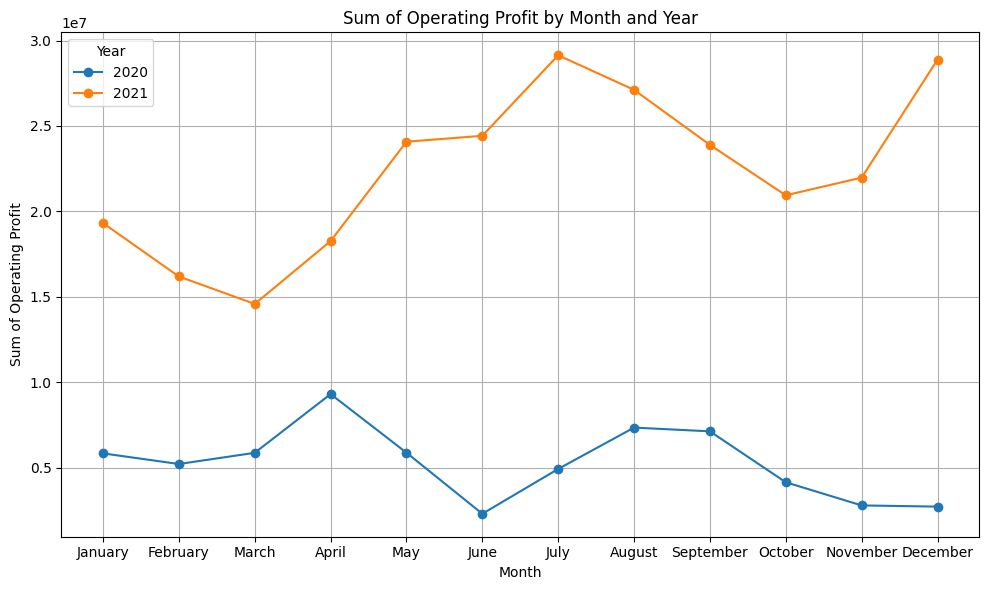

Year and Month with the Highest Operating Profit:
Year: 2021, Month: July, Operating Profit: 29137256.0

Year and Month with the Lowest Operating Profit:
Year: 2020, Month: June, Operating Profit: 2292728.0


In [ ]:
# Calculate sum of operating profit by month and year
sum_operating_profit_by_month_year = adidas.groupby(['Year', 'Month'])['Operating Profit'].sum().reset_index()

# Create a line chart for sum of operating profit by month and year
plt.figure(figsize=(10, 6))
for year in sum_operating_profit_by_month_year['Year'].unique():
    year_data = sum_operating_profit_by_month_year[sum_operating_profit_by_month_year['Year'] == year]
    plt.plot(year_data['Month'], year_data['Operating Profit'], label=str(year), marker='o')

plt.xlabel('Month')
plt.ylabel('Sum of Operating Profit')
plt.title('Sum of Operating Profit by Month and Year')
plt.legend(title='Year')
plt.xticks(range(1, 13), calendar.month_name[1:])  # Use month names from calendar module
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the month with the highest and lowest operating profit across both years
highest_profit_month = sum_operating_profit_by_month_year.loc[sum_operating_profit_by_month_year['Operating Profit'].idxmax()]
lowest_profit_month = sum_operating_profit_by_month_year.loc[sum_operating_profit_by_month_year['Operating Profit'].idxmin()]

# Convert numeric month to string (alphabet)
highest_profit_month_name = calendar.month_name[int(highest_profit_month['Month'])]
lowest_profit_month_name = calendar.month_name[int(lowest_profit_month['Month'])]

# Print the month with the highest and lowest operating profit
print("Year and Month with the Highest Operating Profit:")
print(f"Year: {int(highest_profit_month['Year'])}, Month: {highest_profit_month_name}, Operating Profit: {highest_profit_month['Operating Profit']}")

print("\nYear and Month with the Lowest Operating Profit:")
print(f"Year: {int(lowest_profit_month['Year'])}, Month: {lowest_profit_month_name}, Operating Profit: {lowest_profit_month['Operating Profit']}")

# **SUM OF TOTAL SALES BY PRODUCT**

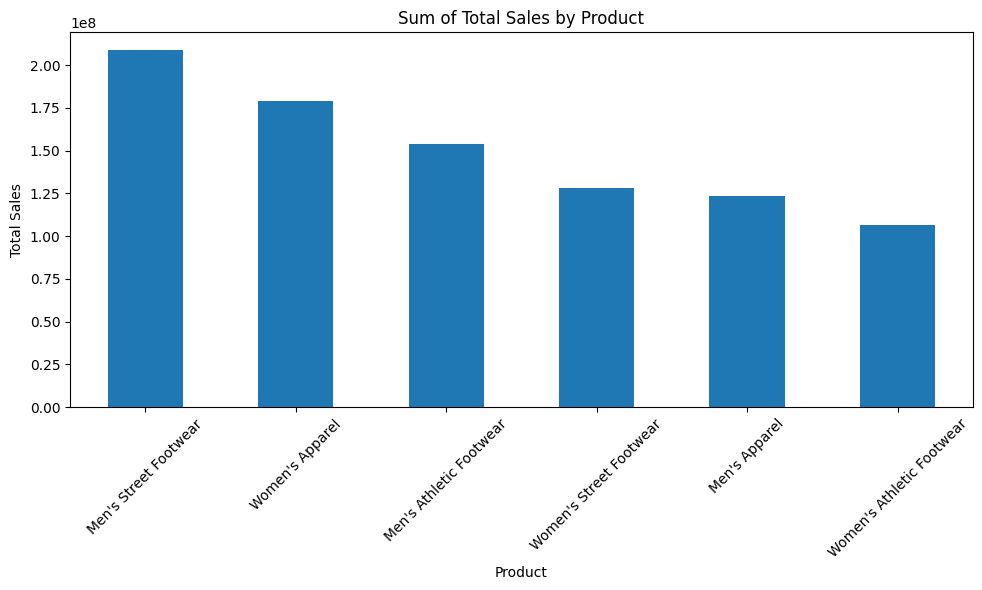


The Product with the highest total sales is: Men's Street Footwear at 208826244.0

The Product with the least total sales is: Women's Athletic Footwear at 106631896.0


In [ ]:
# Calculate sum of total sales by product
sum_total_sales_by_product = adidas.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

# Create a bar plot for sum of total sales by product with blue color palette
plt.figure(figsize=(10, 6))
sum_total_sales_by_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Sum of Total Sales by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Get the sales method with the highest and least sales
highest_product = sum_total_sales_by_product.idxmax()
least_product = sum_total_sales_by_product.idxmin()

# Get the total sales for the highest and least purchase retailers
highest_sales = sum_total_sales_by_product.max()
least_sales = sum_total_sales_by_product.min()

# Display the results
print(f"\nThe Product with the highest total sales is: {highest_product} at {highest_sales}")
print(f"\nThe Product with the least total sales is: {least_product} at {least_sales}")

# **SUM OF OPERATING PROFIT BY PRODUCT**

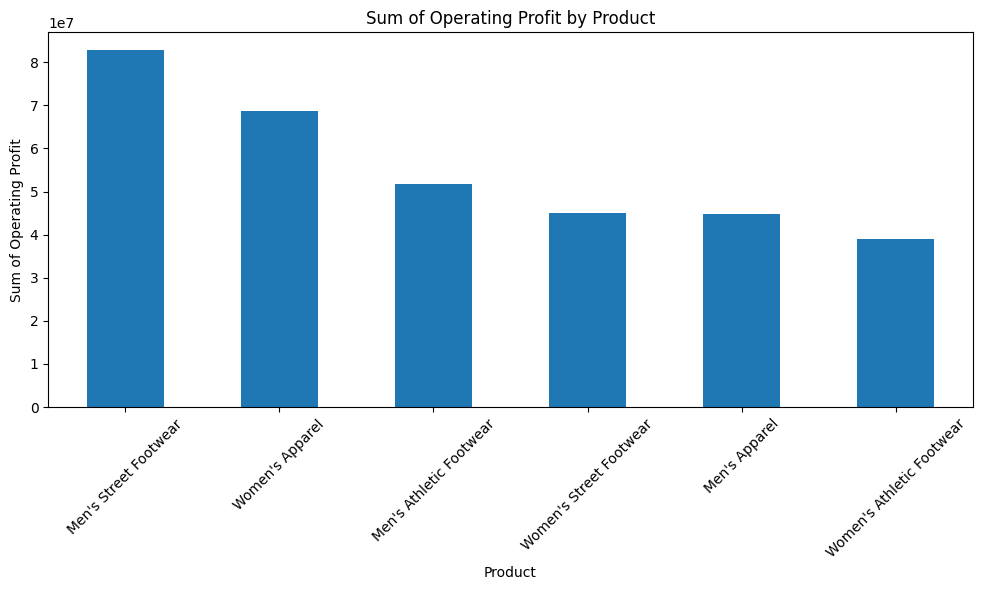


The Product with the highest operating profit is: Men's Street Footwear at 82802323.0

The Product with the least operating profit is: Women's Athletic Footwear at 38975843.0


In [ ]:
# Calculate sum of operating profit by product
sum_operating_profit_by_product = adidas.groupby('Product')['Operating Profit'].sum().sort_values(ascending=False)

# Create a bar chart for sum of operating profit by product
plt.figure(figsize=(10, 6))
sum_operating_profit_by_product.plot(kind='bar')
plt.xlabel('Product')
plt.ylabel('Sum of Operating Profit')
plt.title('Sum of Operating Profit by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Get the sales method with the highest and least sales
highest_product = sum_operating_profit_by_product.idxmax()
least_product = sum_operating_profit_by_product.idxmin()

# Get the total sales for the highest and least purchase retailers
highest_operating_profit = sum_operating_profit_by_product.max()
least_operating_profit = sum_operating_profit_by_product.min()


# Display the results
print(f"\nThe Product with the highest operating profit is: {highest_product} at {highest_operating_profit}")
print(f"\nThe Product with the least operating profit is: {least_product} at {least_operating_profit}")

# **TOP FIVE CITIES BY SALES**

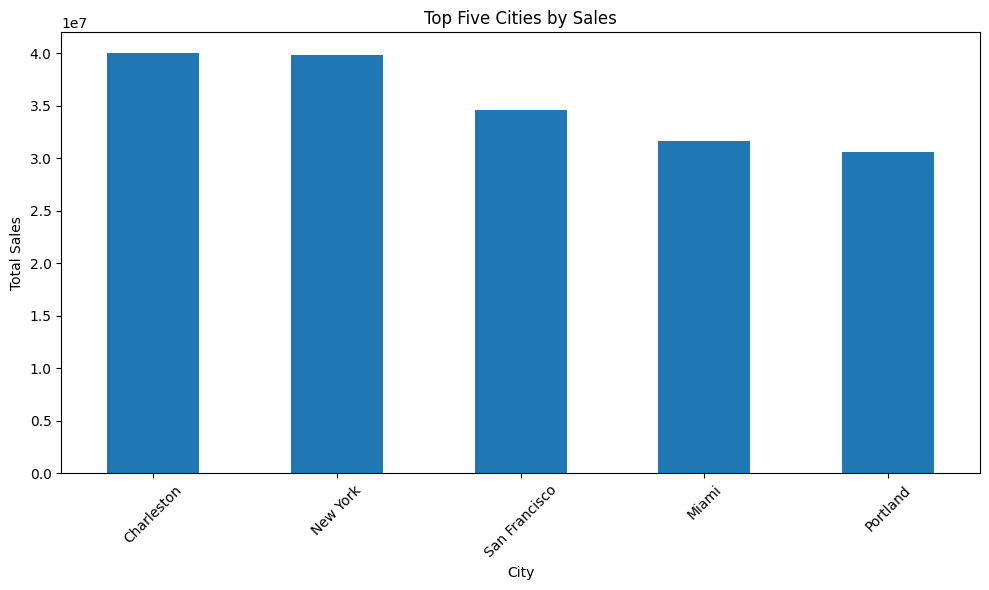


Top Five Cities by Sales:

Charleston : $39974797.00

New York : $39801235.00

San Francisco : $34539220.00

Miami : $31600863.00

Portland : $30545652.00


In [ ]:
# Calculate total sales by city
total_sales_by_city = adidas.groupby('City')['Total Sales'].sum().sort_values(ascending=False)

# Get the top five cities by sales
top_five_cities = total_sales_by_city.head(5)

# Create a bar chart for top five cities by sales
plt.figure(figsize=(10, 6))
top_five_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Top Five Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top five cities and their sales values
print("\nTop Five Cities by Sales:")
for city, sales in top_five_cities.items():
    print(f"\n{city} : ${sales:.2f}")

# **BOTTOM FIVE CITIES BY SALES**

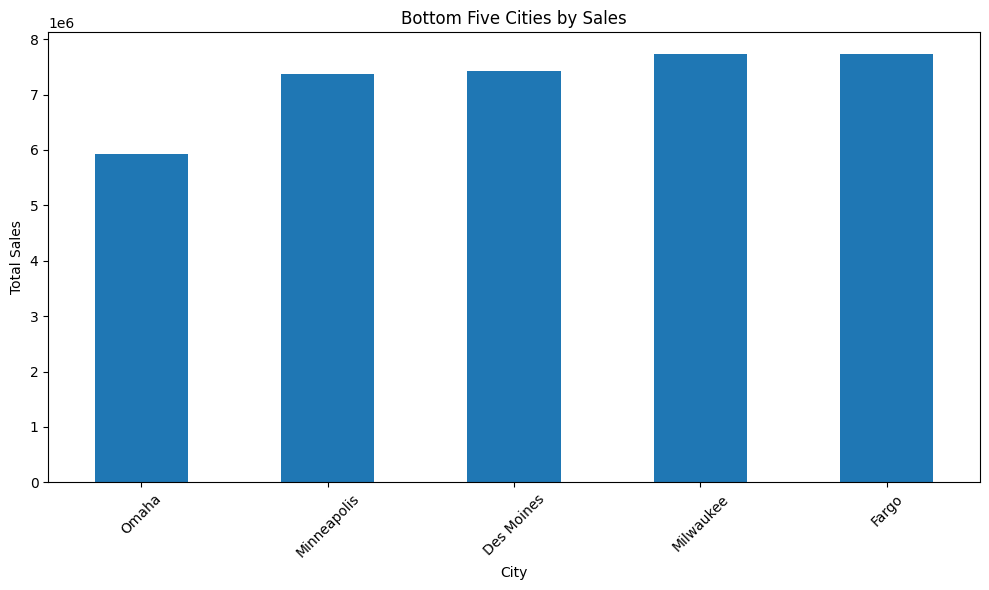


Bottom Five Cities by Sales:

Omaha: $5929038.00

Minneapolis: $7378068.00

Des Moines: $7424011.00

Milwaukee: $7727469.00

Fargo: $7735580.00


In [ ]:
# Calculate total sales by city
total_sales_by_city = adidas.groupby('City')['Total Sales'].sum().sort_values()

# Get the bottom five cities by sales
bottom_five_cities = total_sales_by_city.head(5)

# Create a bar chart for bottom five cities by sales
plt.figure(figsize=(10, 6))
bottom_five_cities.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Bottom Five Cities by Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top five cities and their sales values
print("\nBottom Five Cities by Sales:")
for city, sales in bottom_five_cities.items():
    print(f"\n{city}: ${sales:.2f}")

# **SUM OF TOTAL SALES BY SALES METHOD**

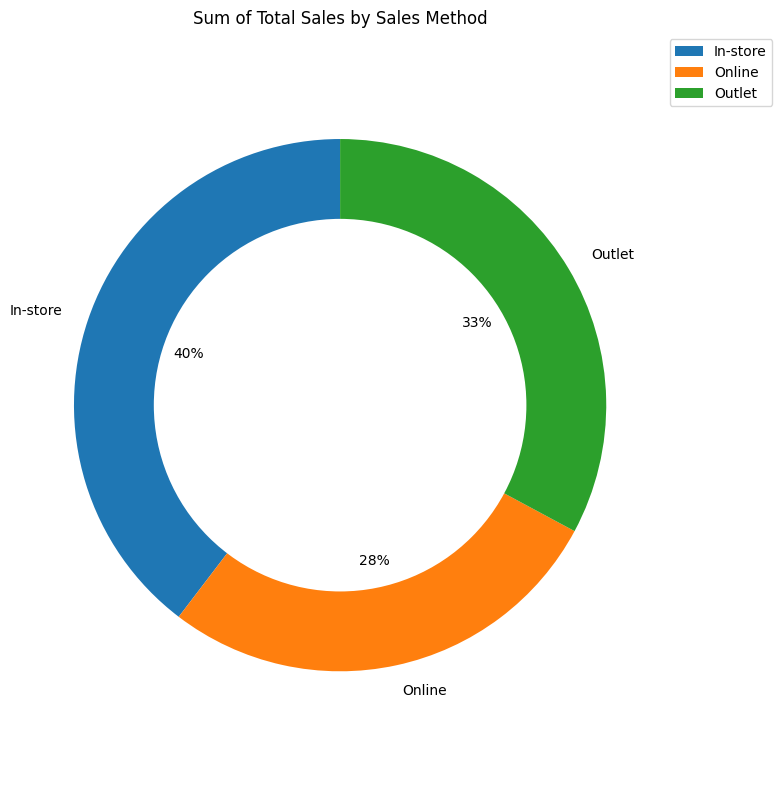


The Sales Method with the highest sales is: In-store at 356643750.0

The Sales Method with the least sales is: Online at 247672882.0


In [ ]:
# Calculate sum of total sales by sales method
sum_total_sales_by_method = adidas.groupby('Sales Method')['Total Sales'].sum()


# Create a doughnut chart for sum of total sales by sales method
plt.figure(figsize=(8, 8))
plt.pie(sum_total_sales_by_method, labels=sum_total_sales_by_method.index, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sum of Total Sales by Sales Method')
plt.axis('equal')

# Add legend with sales methods and colors
plt.legend(labels=sum_total_sales_by_method.index, loc='best', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

# Get the sales method with the highest and least sales
highest_sales_method = sum_total_sales_by_method.idxmax()
least_sales_method = sum_total_sales_by_method.idxmin()

# Get the total sales for the highest and least sales method
highest_sales_total = sum_total_sales_by_method.max()
least_sales_total = sum_total_sales_by_method.min()


# Display the results
print(f"\nThe Sales Method with the highest sales is: {highest_sales_method} at {highest_sales_total}")
print(f"\nThe Sales Method with the least sales is: {least_sales_method} at {least_sales_total}")

# **HIGHEST AND LEAST PURCHASES BY RETAILER**

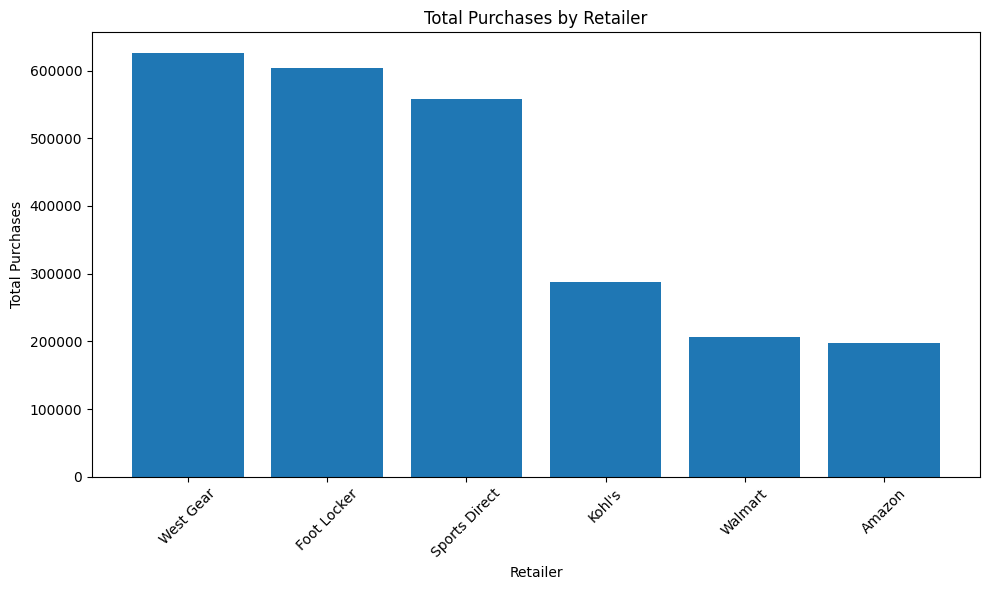

The retailer with the highest purchase is: West Gear at 625262.0
The retailer with the least purchase is: Amazon at 197990.0


In [ ]:
# Calculate total purchases by retailer
total_purchases_by_retailer = adidas.groupby('Retailer')['Units Sold'].sum().sort_values(ascending=False)

# Get the retailer with highest and least purchases
highest_purchases_retailer = total_purchases_by_retailer.idxmax()
least_purchases_retailer = total_purchases_by_retailer.idxmin()

# Create a bar chart for total purchases by retailer
plt.figure(figsize=(10, 6))
plt.bar(total_purchases_by_retailer.index, total_purchases_by_retailer.values)
plt.xlabel('Retailer')
plt.ylabel('Total Purchases')
plt.title('Total Purchases by Retailer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Get the retailer with the highest and least purchases
highest_purchase_retailer = total_purchases_by_retailer.idxmax()
least_purchase_retailer = total_purchases_by_retailer.idxmin()

# Get the total sales for the highest and least purchase retailers
highest_units_sold = total_purchases_by_retailer.max()
least_units_sold = total_purchases_by_retailer.min()

# Display the results
print(f"The retailer with the highest purchase is: {highest_purchase_retailer} at {highest_units_sold}")
print(f"The retailer with the least purchase is: {least_purchase_retailer} at {least_units_sold}")

# **SUM OF OPERATING PROFIT BY SALES METHOD**

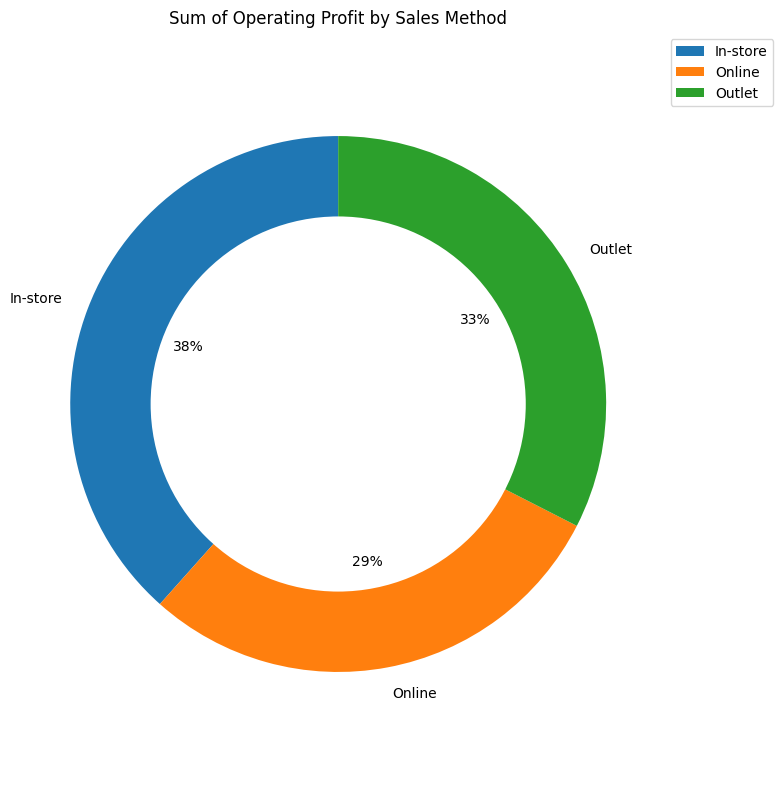

The Sales Method with the highest Operating profit is: In-store at 127591382.0
The Sales Method with the least Operating profit is: Online at 96555337.0


In [ ]:
# Calculate sum of operating profit by sales method
sum_operating_profit_by_method = adidas.groupby('Sales Method')['Operating Profit'].sum()


# Create a doughnut chart for sum of operating profit by sales method
plt.figure(figsize=(8, 8))
plt.pie(sum_operating_profit_by_method, labels=sum_operating_profit_by_method.index, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sum of Operating Profit by Sales Method')
plt.axis('equal')

# Add legend with sales methods and colors
plt.legend(labels=sum_total_sales_by_method.index, loc='best', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()

# Get the sales method with the highest and least operating profit
highest_sales_method = sum_operating_profit_by_method.idxmax()
least_sales_method = sum_operating_profit_by_method.idxmin()

# Get the operating profit for the highest and least sales method
highest_operating_profit = sum_operating_profit_by_method.max()
least_operating_profit = sum_operating_profit_by_method.min()


# Display the results
print(f"The Sales Method with the highest Operating profit is: {highest_sales_method} at {highest_operating_profit}")
print(f"The Sales Method with the least Operating profit is: {least_sales_method} at {least_operating_profit}")

# **SUM OF TOTAL SALES BY REGION**

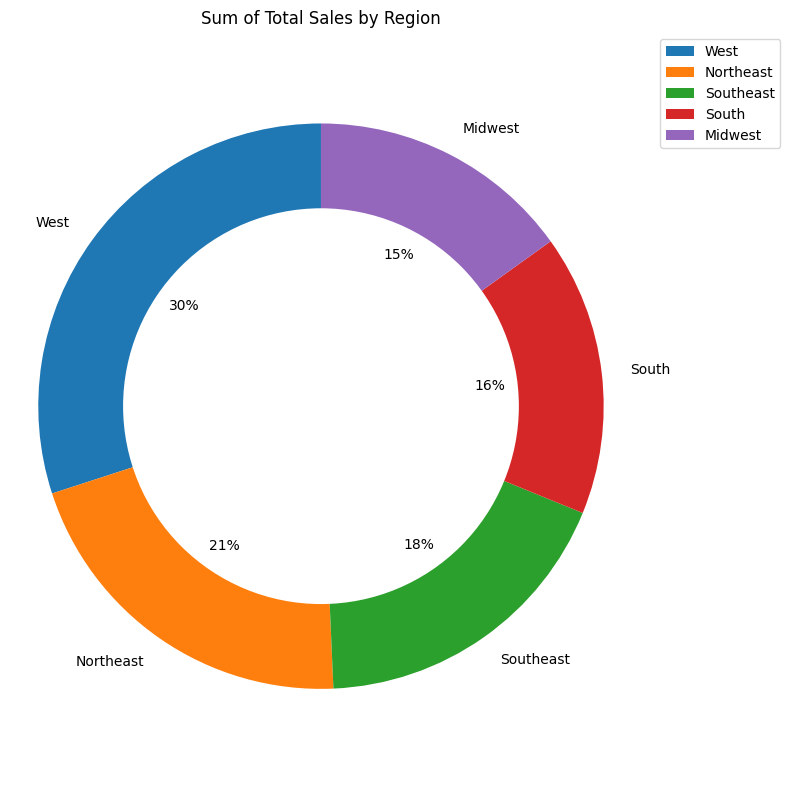

The region with the highest sales is: West at 269943182.0
The region with the least sales is: Midwest at 135800459.0


In [ ]:
#Calculate sum of total sales by Region
Region_sales = adidas.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

# Create a doughnut chart for sum of total sales by region
plt.figure(figsize=(8, 8))
plt.pie(Region_sales, labels=Region_sales.index, autopct='%1.0f%%', startangle=90, wedgeprops=dict(width=0.4))
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sum of Total Sales by Region')
plt.axis('equal')

# Add legend with region and colors
plt.legend(labels=Region_sales.index, loc='best', bbox_to_anchor=(1.25, 1))

plt.tight_layout()
plt.show()


# Get the region with the highest and least sales
highest_region_sales = Region_sales.idxmax()
least_region_sales = Region_sales.idxmin()

# Get the total sales for the highest and least region
highest_sales = Region_sales.max()
least_sales= Region_sales.min()

# Display the results
print(f"The region with the highest sales is: {highest_region_sales} at {highest_sales}")
print(f"The region with the least sales is: {least_region_sales} at {least_sales}")

# **EXPLORE SALES TREND OVER TIME**

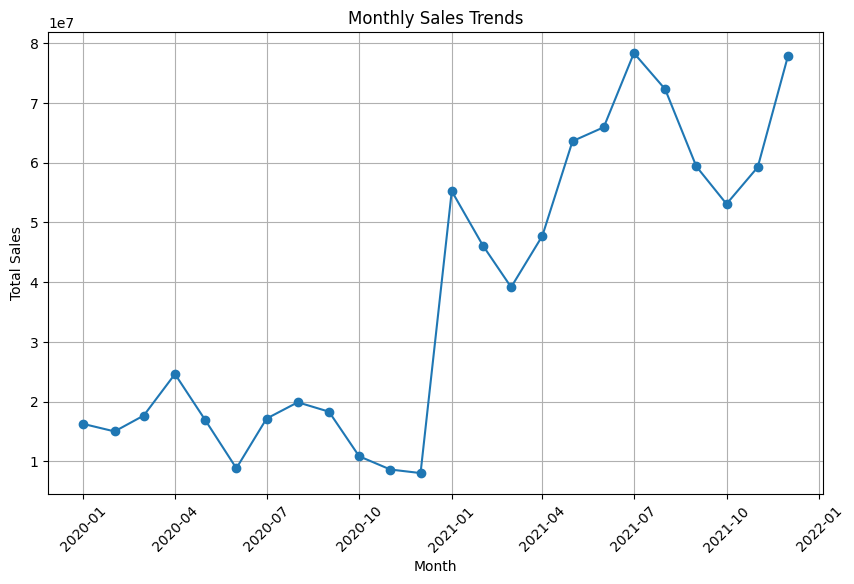


These sales follow a seasonality.

These sales do not follow a trend.


In [ ]:
# Group by month and calculate total sales for each month
monthly_sales = adidas.groupby(adidas['Invoice Date'].dt.to_period('M'))['Total Sales'].sum()

# Convert the index (which is of type 'Period') to DateTime objects
monthly_sales.index = monthly_sales.index.to_timestamp()

# Plot the sales trends over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Analyze the sales trends
diff = monthly_sales.diff()  # Calculate the difference between consecutive months
seasonality_threshold = 10000 # Adjust this threshold based on your data and context

# Check for seasonality
if (diff > seasonality_threshold).any():
    print("\nThese sales follow a seasonality.")
else:
    print("These sales do not follow a seasonality.")

# Check for trend
if (diff > 0).all() or (diff < 0).all():
    print("These sales follow a trend.")
else:
    print("\nThese sales do not follow a trend.")

#**PREDICT SALES FOR THE NEXT 12 MONTHS**

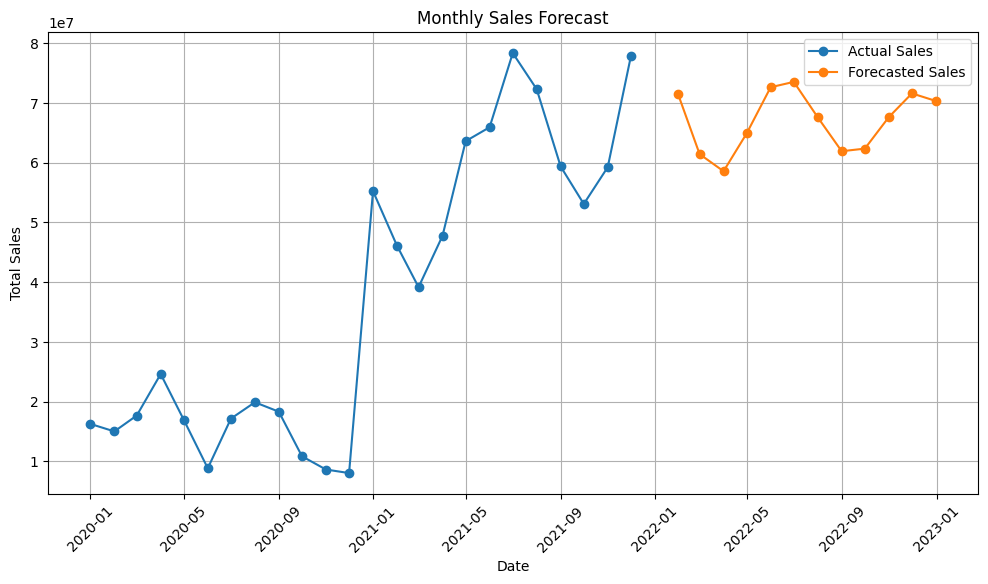

In [ ]:
# Fit the ARIMA model to the data
model = ARIMA(monthly_sales, order=(2,1,2))  # Order: (p, d, q)
model_fit = model.fit()

# Make predictions for the next 12 months
forecast_steps = 12
forecast = model_fit.forecast(steps=forecast_steps)

#Visualize the actual sales data and the forecasted values for the next months.

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', label='Actual Sales')
plt.plot(pd.date_range(start=monthly_sales.index[-1], periods=forecast_steps+1, freq='M')[1:], forecast, marker='o', label='Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Forecast')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()